In [1]:
pip install missingno

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [8]:
data=pd.read_csv('/content/drive/seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [9]:
data.shape

(1461, 6)

<Axes: xlabel='weather', ylabel='count'>

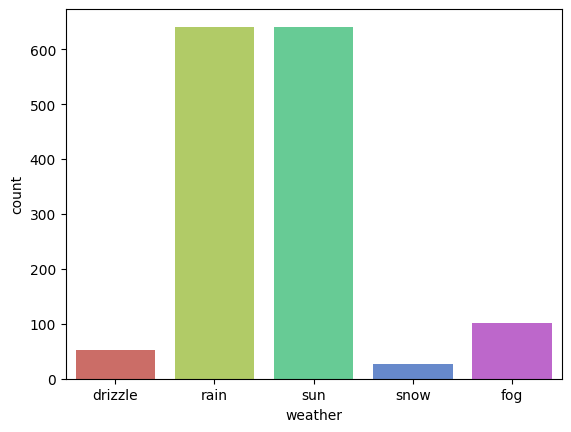

In [13]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather", data=data, palette='hls')

In [15]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [16]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

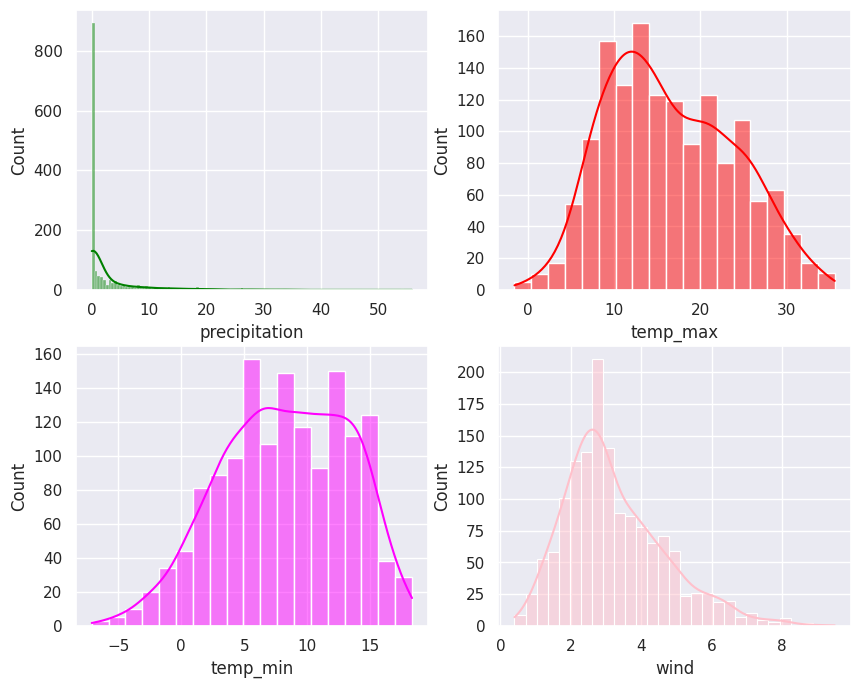

In [17]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='magenta')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='pink')

<Axes: xlabel='wind'>

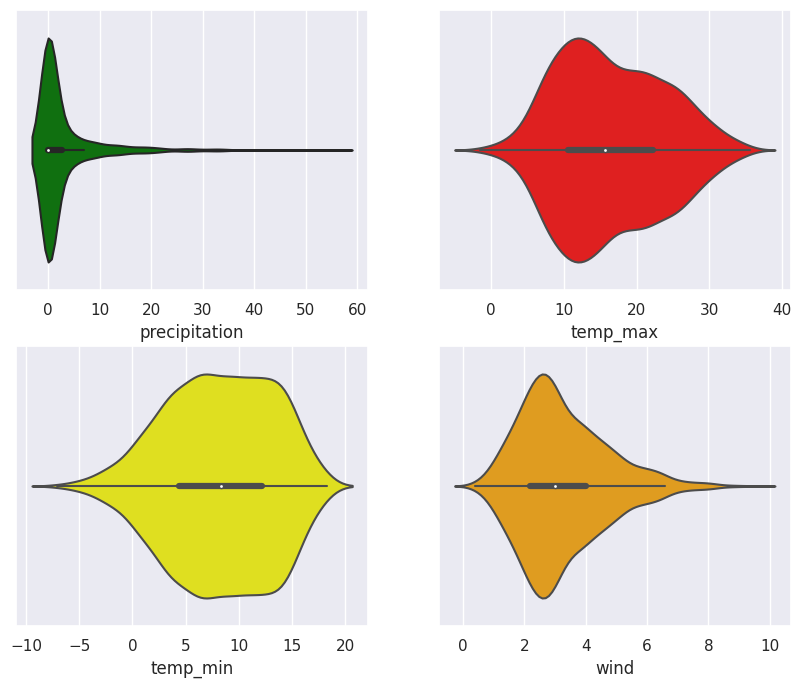

In [19]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='yellow')
sns.violinplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='precipitation', ylabel='weather'>

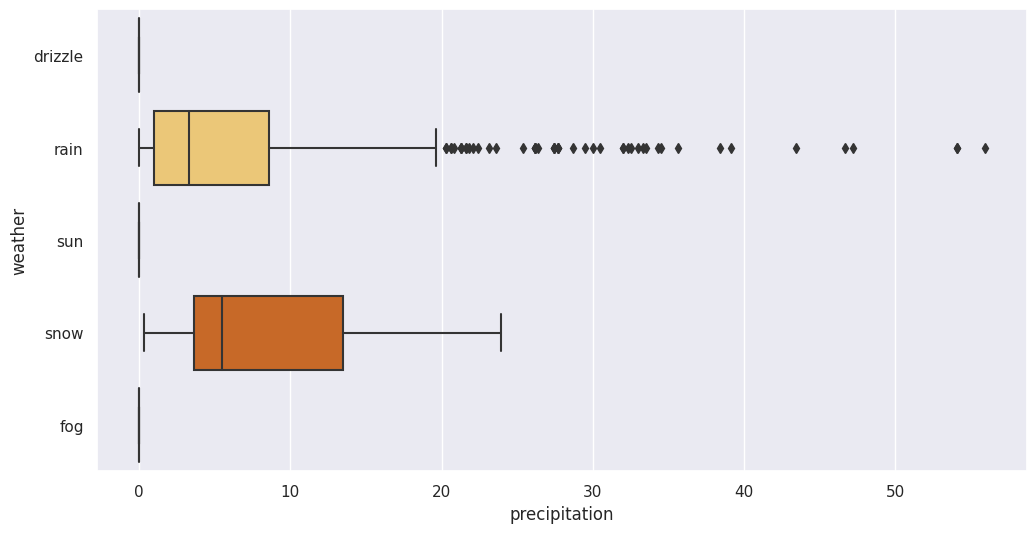

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='precipitation',y='weather',data=data,palette='YlOrBr')

<Axes: xlabel='temp_max', ylabel='weather'>

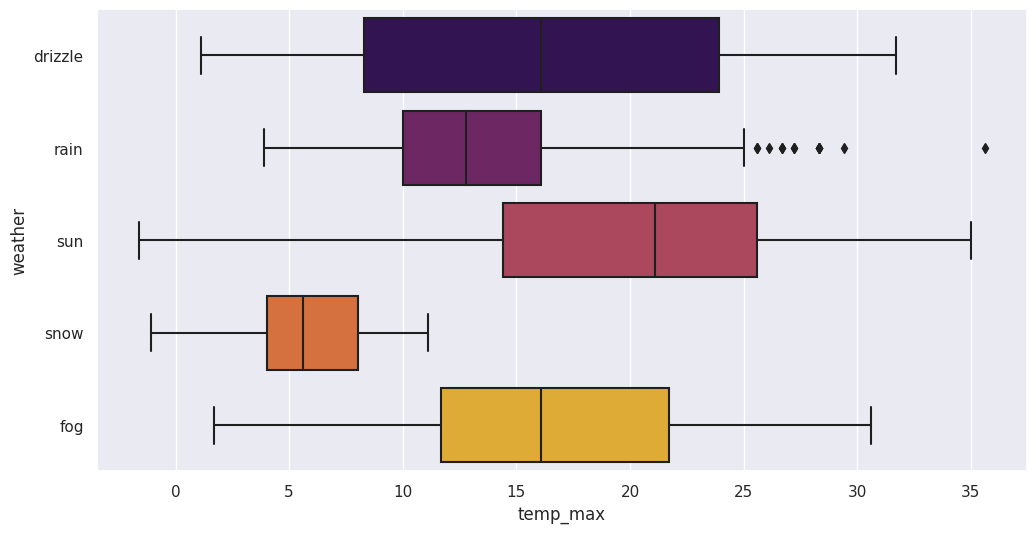

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_max',y='weather',data=data,palette='inferno')

<Axes: xlabel='wind', ylabel='weather'>

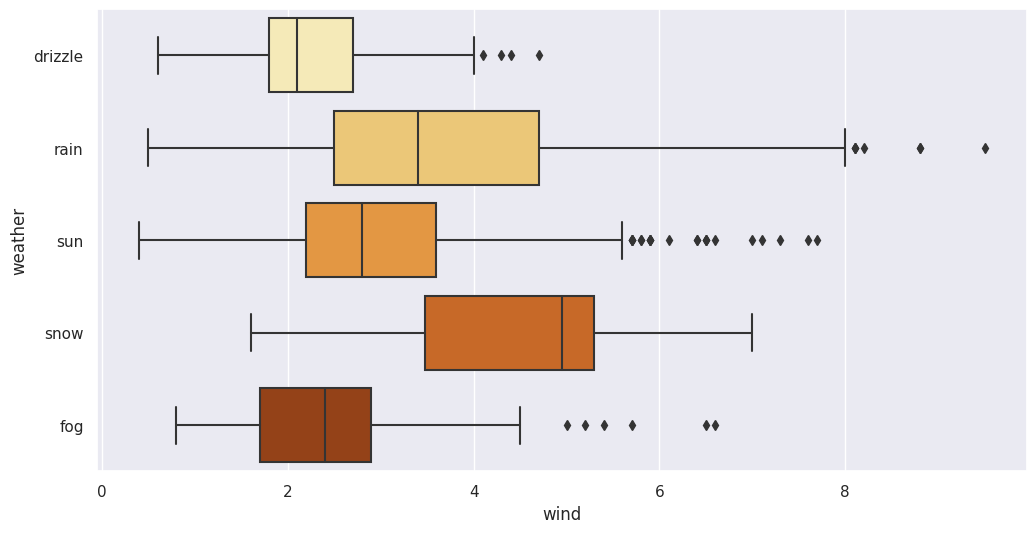

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='wind',y='weather',data=data,palette='YlOrBr')

<Axes: xlabel='temp_min', ylabel='weather'>

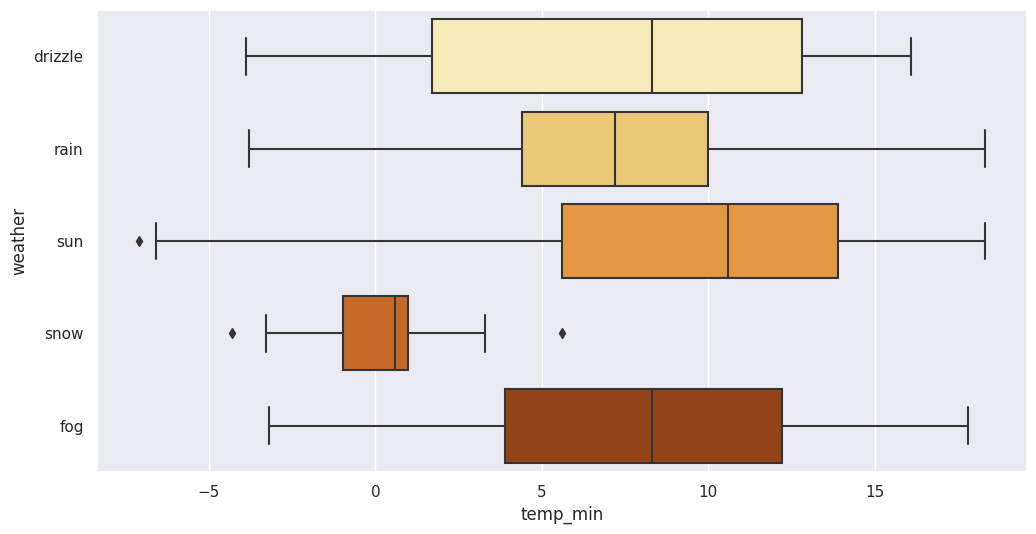

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_min',y='weather',data=data,palette='YlOrBr')

<Axes: >

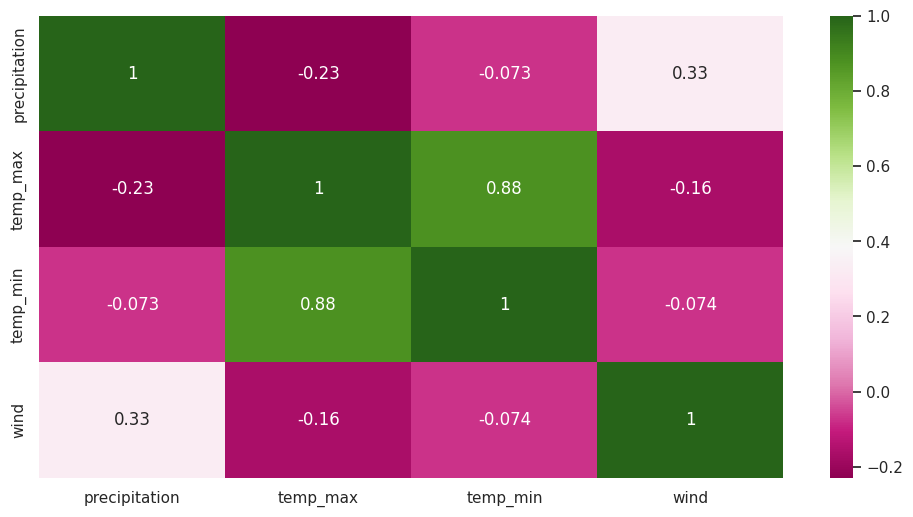

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='PiYG')

pearsons correlation:  -0.22855481643297046
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


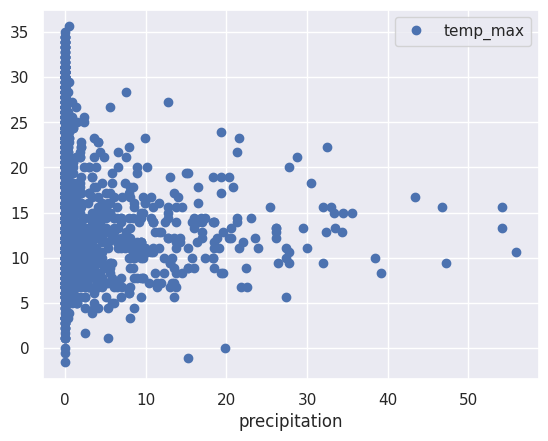

In [30]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495486
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


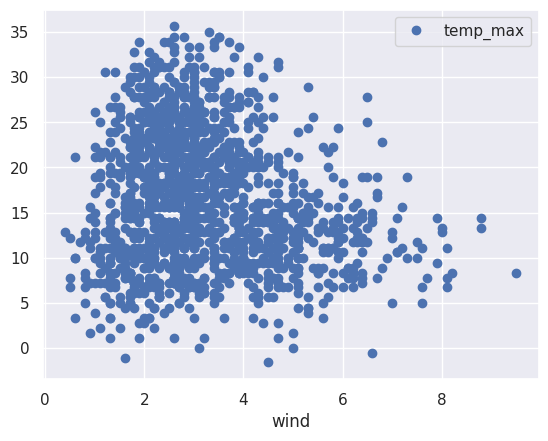

In [31]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

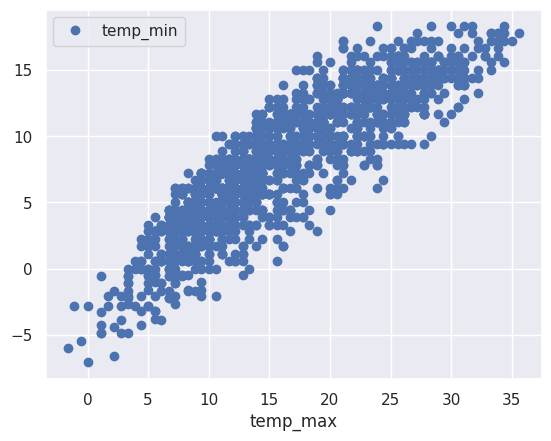

In [32]:
data.plot('temp_max','temp_min',style='o')

In [33]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

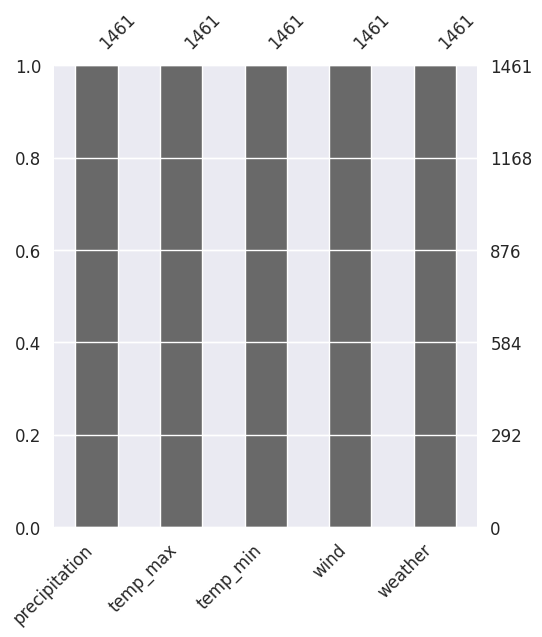

In [34]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

In [35]:
data=data.drop(['date'],axis=1)

In [36]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [37]:
import numpy as np
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)

<Axes: xlabel='wind', ylabel='Count'>

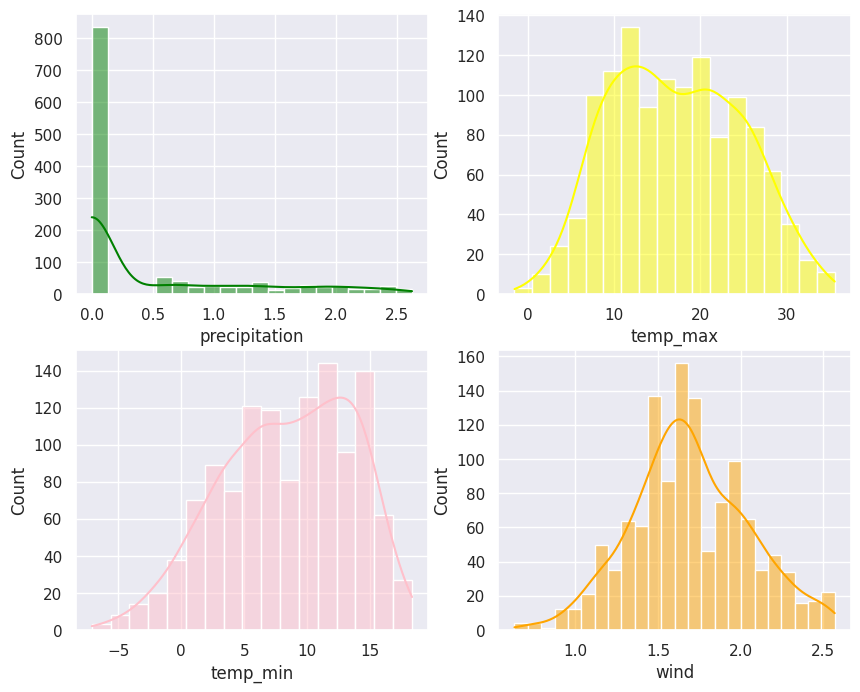

In [38]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='yellow')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='pink')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [39]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [40]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [41]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


In [42]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [43]:
data.weather.unique()

array([0, 2, 4, 3, 1])

**Train Model**

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [45]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN accuracy:75.00%


In [46]:
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))

SVM accuracy:77.42%


In [47]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

GBC accuracy:79.84%


In [48]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

XGB accuracy:82.26%


In [49]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')

the weather is:
rain


In [50]:
import pickle
file = 'model.pkl'
pickle.dump(xgb, open(file, 'wb'))